In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras import layers
from keras import regularizers
from keras import models
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#loading data#loadin 
train=pd.read_csv('Image data/train.csv')
test=pd.read_csv('Image data/test.csv')

In [4]:
train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

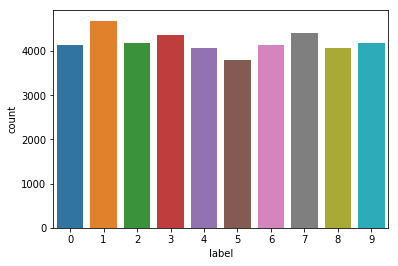

In [5]:
sns.countplot(train['label'])

In [6]:
train_images=train.iloc[:,1:].values
train_labels=train.iloc[:,0:1].values
test_X=test.iloc[:,:].values

In [7]:
list(train_images)

[array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [8]:
train_labels

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]], dtype=int64)

In [9]:
train_images = train_images.reshape((-1, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_X = test_X.reshape(-1,28,28,1)
test_X = test_X / 255.0

In [10]:
print(test_X.shape)
print(train_images.shape)

(28000, 28, 28, 1)
(42000, 28, 28, 1)


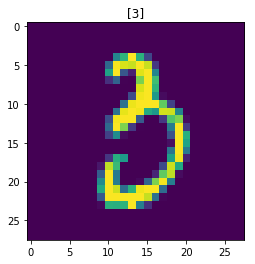

In [11]:
# Some examples# Some  
g = plt.imshow(train_images[150][:,:,0])
g=plt.title(train_labels[150])

In [12]:
train_labelstrain_1  = to_categorical(train_labels)
train_labelstrain_1

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [13]:
#using data agumenteation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
datagen.fit(train_images)
gen.fit(train_images)

# Convolution Neural Network

In [14]:
model = models.Sequential()

model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (28,28,1)))
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

# TRAIN MODEL

In [ ]:
# Fit the model# Fit th 
history = model.fit_generator(gen.flow(train_images,train_labelstrain_1, batch_size=1),
                              epochs = 5, 
                              verbose = 2, steps_per_epoch=train_images.shape[0] // 1
                              )

Epoch 1/5
